# CNN Cancer Detection Kaggle Mini-Project

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from tensorflow.python.keras.saving.saved_model.serialized_attributes import metrics

import os
# import tifffile
# import cv2

train_labels = pd.read_csv('train_labels.csv')
raw_data_path = r'C:\Users\nikok\Documents\CNN Cancer Detection Kaggle Mini-Project'


In [106]:
def read_pic(file, method='keras'):
    if method == 'keras':
        img = keras.utils.load_img(file)
        x = keras.utils.img_to_array(img)
        x = np.expand_dims(x, axis=0)
    # if method == 'tifffile':
    #     img = tifffile.imrad(file)
    # elif method == 'cv2':
    #     img = cv2.imread(file)
    return img, x


## Brief description of the problem and data 
*Briefly describe the challenge problem and NLP. Describe the size, dimension, structure, etc., of the data.* 

The training set has 220k images and testing set has 57k images. The train/test split is 80/20. Number of images matches the number of labels in the csv file. 

Picture size is 96x96 (total number of pixels 9216) and three channels.



In [111]:
train_files = os.listdir(os.path.join(raw_data_path, 'train'))
test_files = os.listdir(os.path.join(raw_data_path, 'test'))
train_split = len(train_files)/(len(train_files)+len(test_files))

print('Number of training labels:', len(train_labels))
print('Number of training images:', len(train_files), '(' + str(round(train_split*100))+'%)')
print('Number of testing images:', len(test_files), '(' + str(round((1-train_split)*100))+'%)')


print('\nStructure of training labels:')
print(train_labels.head())

print()
img, X = read_pic(os.path.join(raw_data_path, 'train', train_files[0]))
print('Image size:', X.shape[1:3])
print('Number of image channels', X.shape[-1])

Number of training labels: 220025
Number of training images: 220025 (79%)
Number of testing images: 57458 (21%)

Structure of training labels:
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

Image size: (96, 96)
Number of image channels 3


## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data
*Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis?*


Any duplicated entries in labels: False
Do the ids in label csv match the image file names: True
Number of positive labels: 89117 (41%)
Number of negative labels: 130908 (59%)


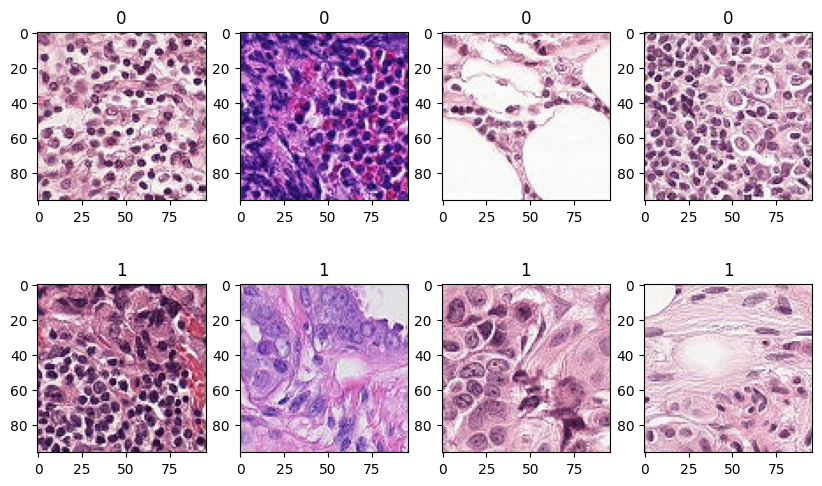

In [100]:
print('Any duplicated entries in labels:', np.any(train_labels.duplicated()))
print('Do the ids in label csv match the image file names:', sorted(train_files) == sorted(train_labels.id+'.tif'))

pos = np.sum(train_labels.label == 1)
neg = np.sum(train_labels.label == 0)
print('Number of positive labels:', pos, '(' + str(round(pos/(neg+pos)*100))+'%)')
print('Number of negative labels:', neg, '(' + str(round(neg/(neg+pos)*100))+'%)')


plt.figure(figsize=(10, 6))
files = np.random.choice(train_labels.id[train_labels.label==0], 4, replace=False)
files = np.append(files, np.random.choice(train_labels.id[train_labels.label==1], 4, replace=False))
files = files + '.tif'
for i, file in enumerate(files):
    ax = plt.subplot(2, 4, i + 1)
    img, X = read_pic(os.path.join(raw_data_path, 'train', file))
    i_lbl = np.where(train_labels.id+'.tif' == file)[0]
    plt.title((train_labels.label.iloc[i_lbl].values)[0])
    plt.imshow(img)



## Model Architecture
*Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem. Compare multiple architectures and tune hyperparameters.*

### Architecture
Activation
Filter sizes
Structure

### Hyperparameters
Padding
Filter size

In [ ]:
def my_model():
    inputs = 

In [105]:
X.shape

(96,96) + (3,)

(96, 96, 3)

## Results and Analysis
*Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.*

*Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.*

## Conclusion
*Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?*

# Sources
https://keras.io/examples/vision/image_classification_from_scratch/
